In [1]:
import copy
import networkx as nx
from collections import defaultdict
from functools import lru_cache

In [2]:
def permutation(elements:list):
    if not elements: return [[]]
    head=elements[0]
    remain=permutation(elements[1:])
    return [r[:i]+[head]+r[i:] for i in range(len(elements)) for r in remain]

In [3]:
def merge_sort(elements:list):
    if len(elements)==1:return elements
    mid_index=len(elements)//2
    left=merge_sort(elements[:mid_index])
    right=merge_sort(elements[mid_index:])
    sorted_value=[]
    while(left and right):
        left_value=left[0]
        right_value=right[0]
        if(left_value<=right_value):
            sorted_value.append(left_value)
            left.pop(0)
        else:
            sorted_value.append(right_value)
            right.pop(0)
    sorted_value+=(left or right)
    return sorted_value

In [4]:
def quick_sort(elements:list):
    if not elements:return elements
    head=elements[0]
    return quick_sort([item for item in elements[1:] if item<=head])+[head]+quick_sort([item for item in elements[1:] if item>head])

In [5]:
simple_graph={
    'A':'B C D'.split(),
    'B':'A'.split(),
    'C':'A E'.split(),
    'D':'A'.split(),
    'E':'F C G W'.split(),
    'W':'E'.split(),
    'F':'H I E'.split(),
    'G':'H E'.split(),
    'H':'I F G'.split()
}

def get_mapping_graph(graph):
    mapping_graph=defaultdict(set)
    for key,nodes in graph.items():
        mapping_graph[key].update(nodes)
        for node in nodes:
            mapping_graph[node].add(key)
    mapping_graph={key:list(nodes) for key,nodes in mapping_graph.items()}
    return mapping_graph

In [6]:
get_mapping_graph(simple_graph)

{'A': ['B', 'D', 'C'],
 'B': ['A'],
 'C': ['A', 'E'],
 'D': ['A'],
 'E': ['W', 'G', 'F', 'C'],
 'F': ['H', 'I', 'E'],
 'G': ['H', 'E'],
 'W': ['E'],
 'H': ['G', 'I', 'F'],
 'I': ['H', 'F']}

In [7]:
import networkx as nx
import copy

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


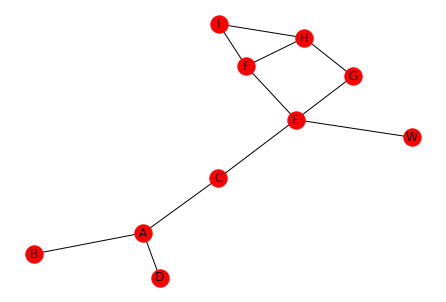

In [8]:
nx.draw(nx.Graph(get_mapping_graph(simple_graph)),with_labels=True)

In [9]:
def traverse_graph(start,connections,path):
    # if not connections:return [start]
    if start not in connections:
        path.append(start)
        return
    subgraph=connections[start]
    path.append(start)
    for node in subgraph:
        #if node not in connections:continue
        if node in path:continue
        traverse_graph(node,connections,path)

In [10]:
path=[]
traverse_graph("B",simple_graph,path)
print(path)

['B', 'A', 'C', 'E', 'F', 'H', 'I', 'G', 'W', 'D']


In [11]:
solution={}
@lru_cache(maxsize=2**10)
def edit_distance(string1,string2):
    if len(string1)==0 and len(string2)!=0:
        string1_increase=(edit_distance(string1,string2[:-1])+1,'insert {}'.format(string2[-1]))
        candidates=[string1_increase]
    elif len(string1)!=0 and len(string2)==0:
        string1_decrease=(edit_distance(string1[:-1],string2)+1,'del {}'.format(string1[-1]))
        candidates=[string1_decrease]
    elif len(string1)==0 and len(string2)==0:
        return 0
    else:
        if(string1[-1]==string2[-1]):
            string12_decrease=(edit_distance(string1[:-1],string2[:-1])+0,'go_ahead')
        else:
            string12_decrease=(edit_distance(string1[:-1],string2[:-1])+1,'replace {}=>{}'.format(string1[-1],string2[-1]))
        string1_increase=(edit_distance(string1,string2[:-1])+1,'insert {}'.format(string2[-1]))
        string1_decrease=(edit_distance(string1[:-1],string2)+1,'del {}'.format(string1[-1]))
        candidates=[string12_decrease,string1_increase,string1_decrease]
    min_distance,operation=min(candidates,key=lambda x:x[0])
    solution[(string1,string2)]=operation
    return min_distance

def parse_solution(solution,string1,string2):
    if not string1 and not string2:
        return []
    current_operation=solution[(string1,string2)]
    action=current_operation.split()[0]
    mapping_dict={'go_ahead':[-1,-1],'del':[-1,None],
                  'insert':[None,-1],'replace':[-1,-1]}
    left,right=mapping_dict[action]
    if action=='go_ahead':
        result=[]
    else:
        result=[current_operation]
    return result+parse_solution(solution,string1[:left],string2[:right])

In [12]:
string1='你好啊？'
string2='确定你好吗'
solution={}
distance=edit_distance(string1,string2)
edit_distance.cache_clear()
print('edit_distance:',distance)
print(solution)
print('transformation process:',parse_solution(solution,string1,string2))

edit_distance: 4
{('', '确'): 'insert 确', ('你', ''): 'del 你', ('你', '确'): 'replace 你=>确', ('', '确定'): 'insert 定', ('你', '确定'): 'replace 你=>定', ('你好', ''): 'del 好', ('你好', '确'): 'replace 好=>确', ('你好', '确定'): 'replace 好=>定', ('', '确定你'): 'insert 你', ('你', '确定你'): 'go_ahead', ('你好', '确定你'): 'replace 好=>你', ('你好啊', ''): 'del 啊', ('你好啊', '确'): 'replace 啊=>确', ('你好啊', '确定'): 'replace 啊=>定', ('你好啊', '确定你'): 'replace 啊=>你', ('', '确定你好'): 'insert 好', ('你', '确定你好'): 'insert 好', ('你好', '确定你好'): 'go_ahead', ('你好啊', '确定你好'): 'del 啊', ('你好啊？', ''): 'del ？', ('你好啊？', '确'): 'replace ？=>确', ('你好啊？', '确定'): 'replace ？=>定', ('你好啊？', '确定你'): 'replace ？=>你', ('你好啊？', '确定你好'): 'replace ？=>好', ('', '确定你好吗'): 'insert 吗', ('你', '确定你好吗'): 'insert 吗', ('你好', '确定你好吗'): 'insert 吗', ('你好啊', '确定你好吗'): 'replace 啊=>吗', ('你好啊？', '确定你好吗'): 'replace ？=>吗'}
transformation process: ['replace ？=>吗', 'del 啊', 'insert 定', 'insert 确']


In [13]:
def remove_duplicate(elements):
    if not elements:return []
    for i in range(len(elements)//2,0,-1):
        remain=elements[i:]
        if elements[:i]==remain[:i]:
            return remove_duplicate(remain)
    return [elements[0]]+remove_duplicate(elements[1:])

In [14]:
elements='我今天真的真的很想去看去看电影'
print(remove_duplicate(elements))

['我', '今', '天', '真', '的', '很', '想', '去', '看', '电', '影']


In [15]:
def flatten(expression:tuple):
    if not expression:return []
    if not isinstance(expression,tuple):
        return [expression]
    return flatten(expression[0])+flatten(expression[1:])

In [16]:
expression=(((1,2),3),((4,5),(6,7)),(((8,9))))
print(flatten(expression))

[1, 2, 3, 4, 5, 6, 7, 8, 9]
